# Graph Signal Processing

A graph is defined by $G = (V, E)$, where
- $V$ (vertices) is the set of nodes (e.g. weather stations, sensors), and
- $E$ (edges) is the set of connections between nodes (e.g. roads, communication links).

A **graph signal** is a function that assigns a value to each node at a particular instant in time. For example, imagine recording the temperature at all weather stations simultaneously. This measurement is a graph signal:
$$
f : V \to \mathbb{R}
$$

Example: we have $f$ take a reading at each node in $V$, and output a scalar value (the temperature) at that node. 

In this case, each node is assigned a single scalar value (its temperature), and these values need not be unique—they simply represent the state of each node at that time. Thus, a signal can be seen as a snapshot of some property across the entire network.

For our example, assume we have $n$ connected weather stations, thus $n$ nodes. For the whole graph, we can represent the signal as a vector:
$$
f = [f_1, f_2, \dots, f_n]^T \in \mathbb{R}^n
$$

The topology of the network is described by matrices that capture the connectivity among nodes:

- **Adjacency Matrix ($W$):**  
  An $n \times n$ matrix where $W_{ij}$ reflects the weight of the edge between nodes $i$ and $j$. A higher value indicates a stronger connection.

- **Degree Matrix ($D$):**  
  A diagonal matrix where each entry is the sum of the weights of the edges connected to a node:
  $$
  D_{ii} = \sum_j W_{ij}
  $$

The **graph Laplacian** combines this information to reflect how signals diffuse over the network. We define it as:
- **Unnormalised Laplacian:**
$$
L = D - W
$$
- **Normalised (symmetric) Laplacian:**
$$
L_{\text{sym}} = I - D^{-1/2} W D^{-1/2}
$$

The Laplacian encapsulates the graph’s structure. Its eigenvectors form the graph Fourier basis, and the eigenvalues act as frequencies– tools that are invaluable for tasks such as clustering and filtering.

### A Simple Example with Weather Stations

Consider a network of three weather stations:
- **Vertices:** $V = \{1, 2, 3\}$
- **Edges:** $E = \{(1,2), (2,3)\}$, where each edge has weight 1 (indicating, for example, similar geographic proximity).

Graphically, the network is:
```
1 -- 2 -- 3
```

At a given moment, suppose we record the following temperatures:
- Station 1: $f_1 = 15^\circ$ C
- Station 2: $f_2 = 16^\circ$ C
- Station 3: $f_3 = 15.5^\circ$ C

The temperature readings form the graph signal:
$$
f = \begin{bmatrix} 15 \\ 16 \\ 15.5 \end{bmatrix}
$$
This signal is simply a snapshot—each station (node) has one corresponding measurement.

Now, let’s look at the matrices that describe the network:

- **Adjacency Matrix ($W$):**
$$
W = \begin{bmatrix}
0 & 1 & 0\\[6pt]
1 & 0 & 1\\[6pt]
0 & 1 & 0
\end{bmatrix}
$$

- **Degree Matrix ($D$):**
$$
D = \begin{bmatrix}
1 & 0 & 0\\[6pt]
0 & 2 & 0\\[6pt]
0 & 0 & 1
\end{bmatrix}
$$

- **Graph Laplacian ($L$):**
$$
L = D - W = \begin{bmatrix}
1 & -1 & 0\\[6pt]
-1 & 2 & -1\\[6pt]
0 & -1 & 1
\end{bmatrix}
$$

**Summary of concepts:**
- $G$, $V$, $E$, $W$, and $D$ define the topology and connectivity of the network (for instance, the weather stations and the links between them).
- A graph signal (like temperature readings) is a set of values assigned to each node at a specific time.
- The Laplacian $L$ is derived from $D$ and $W$ and is key for spectral analysis, such as clustering stations by similar behaviour.

This guide shows that a signal is not a single value for the entire network but a collection of values—one per node—reflecting a property measured at an instant.

## Spectral Clustering Example
Spectral clustering is a powerful technique for identifying clusters in graphs — groups of nodes that are more connected to each other than to the rest of the graph. It uses the eigenvalues and eigenvectors of the Laplacian matrix to find a low-dimensional representation of the graph.

Consider the graph – a graph that’s *almost disconnected* with two weakly connected clusters.

```
0 — 1    2 — 3
     \  /     
      4       
```

Edges:
- 1 → 2 with weight 2
- 2 → 5 with weight 1
- 3 → 4 with weight 2
- 3 → 5 with weight 1

Visual: node 5 links two clusters.

### Step 1: Adjacency Matrix $W$

$$
W = 
\begin{bmatrix}
0 & 2 & 0 & 0 & 0 \\
2 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 2 & 1 \\
0 & 0 & 2 & 0 & 1 \\
0 & 1 & 1 & 1 & 0 \\
\end{bmatrix}
$$

### Step 2: Degree Matrix $D$

$$
D = 
\begin{bmatrix}
2 & 0 & 0 & 0 & 0 \\
0 & 3 & 0 & 0 & 0 \\
0 & 0 & 3 & 0 & 0 \\
0 & 0 & 0 & 3 & 0 \\
0 & 0 & 0 & 0 & 3 \\
\end{bmatrix}
$$

### Step 3: Laplacian $L = D - W$

$$
L = 
\begin{bmatrix}
2 & -2 & 0 & 0 & 0 \\
-2 & 3 & 0 & 0 & -1 \\
0 & 0 & 3 & -2 & -1 \\
0 & 0 & -2 & 3 & -1 \\
0 & -1 & -1 & -1 & 3 \\
\end{bmatrix}
$$

### Step 4: Eigenvalues of $L$

Solving $ Lu = \lambda u $, we get:

$$
\lambda \approx [0, 0.5858, 3.4142, 5.0, 5.0]
$$

### Step 5: Fiedler Vector ($u_2$)

This is the **second smallest** eigenvector:

$$
u_2 \approx [-0.6219,\ -0.4397,\ 0.4397,\ 0.4397,\ 0.1821]
$$

#### Interpretation of Clusters from Fiedler Vector

- **Negative values** → nodes 1, 2
- **Positive values** → nodes 3, 4
- **Near-zero** → node 5

By **sign thresholding**, you get two clusters:
- Cluster A: nodes 1 and 2 (negative side)
- Cluster B: nodes 3 and 4 (positive side)
- Node 5: ambiguous — lies on the “spectral boundary”

This is not an artefact — it is exactly the point of spectral clustering: node 5 is a weak bridge between the two components. It gets a neutral value because it lies between the two clusters in the graph topology.

### Other Methods:

1. **Sign thresholding:**
   - Assign clusters based on $\text{sign}(u_2)$.
   - Node 5 can be optionally excluded or assigned by proximity.

2. **1D k-means:**
   - Run k-means on the vector values in $\mathbb{R}$ — a 1D clustering.
   - This gives similar results to sign thresholding for $k=2$, and can be extended more softly for larger $k$.

3. **Row embedding:**
   - Use multiple eigenvectors (e.g. $u_2, u_3$) so that each node becomes a point in $\mathbb{R}^2$.
   - Cluster these points with standard k-means.

## Magnitudes

The fact that:

$$
|u_2(1)| > |u_2(2)|,\quad |u_2(3)| = |u_2(4)| > |u_2(5)|
$$

indicates that:
- Node 1 is more “interior” to its cluster than node 2.
- Nodes 3 and 4 are strongly embedded in their cluster.
- Node 5 is near the boundary.

The Laplacian eigenvectors minimise variation across edges, so the Fiedler vector not only identifies the cluster split but also encodes how strongly each node belongs to its cluster.

## Summary

- $u_2$ is a scalar-valued function on the graph’s nodes.
- Its **sign** indicates which side of the “natural cut” a node lies.
- Its **magnitude** reflects how strongly it belongs to that side.
- Nodes near zero (like node 5) are spectrally ambiguous, meaning they lie at the bottleneck between clusters.

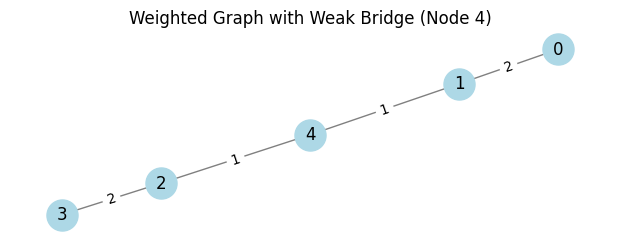

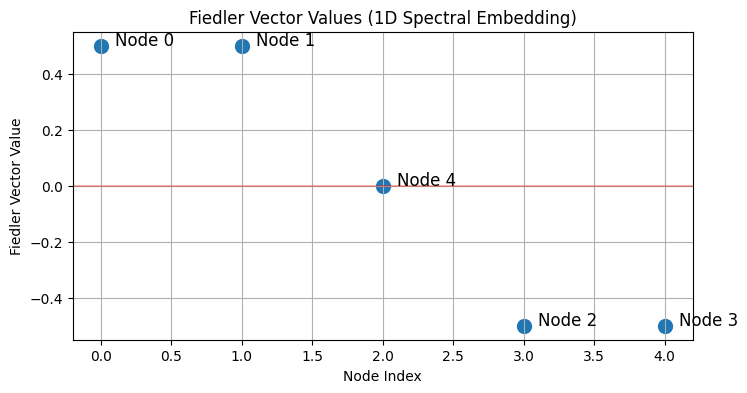

Cluster assignment by Fiedler vector sign:
Node 0: 0.5000 - Positive cluster
Node 1: 0.5000 - Positive cluster
Node 4: -0.0000 - Bridge node (near zero)
Node 2: -0.5000 - Negative cluster
Node 3: -0.5000 - Negative cluster


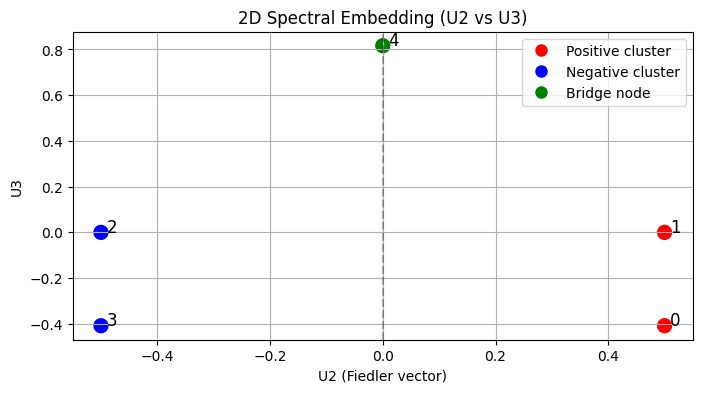

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.sparse.linalg import eigsh
from matplotlib.lines import Line2D

edges = [
    (0, 1, 2),  
    (1, 4, 1),  
    (4, 2, 1),  
    (3, 2, 2),  
]

ref = {0: 0, 1: 1, 2: 4, 3: 2, 4: 3}  

G = nx.Graph()
G.add_weighted_edges_from(edges)
pos = nx.spring_layout(G, seed=42)  

plt.figure(figsize=(6, 2))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, edge_color='grey')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Weighted Graph with Weak Bridge (Node 4)")
plt.show()

# ----------------------------------------------------------------------
# 3) Construct the Laplacian & compute the Fiedler vector
# ----------------------------------------------------------------------
A = nx.to_numpy_array(G)           # adjacency matrix
D = np.diag(A.sum(axis=1))         # degree matrix
L = D - A                          # unnormalised Laplacian

D_inv_sqrt = np.diag(1.0 / np.sqrt(np.diag(D)))
L_sym = np.eye(len(D)) - D_inv_sqrt @ A @ D_inv_sqrt  # symmetric normalised Laplacian

# Smallest 3 eigenvalues (the second is the Fiedler eigenvalue)
eigvals, eigvecs = eigsh(L_sym, k=3, which='SM')
fiedler_vector = eigvecs[:, 1]
U = eigvecs[:, 1:3]  # for 2D plotting (U2 vs U3)

# ----------------------------------------------------------------------
# 4) 1D Plot of the Fiedler vector
# ----------------------------------------------------------------------
plt.figure(figsize=(8, 4))
plt.scatter(range(5), fiedler_vector, s=100)
for i in range(5):
    plt.text(i + 0.1, fiedler_vector[i], f'Node {ref[i]}', fontsize=12)
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.title("Fiedler Vector Values (1D Spectral Embedding)")
plt.xlabel("Node Index")
plt.ylabel("Fiedler Vector Value")
plt.grid(True)
plt.show()

# ----------------------------------------------------------------------
# 5) Print cluster assignments by sign of the Fiedler vector
# ----------------------------------------------------------------------
print("Cluster assignment by Fiedler vector sign:")
for i in range(5):
    val = fiedler_vector[i]
    if val > 0.01:
        cluster = "Positive cluster"
    elif val < -0.01:
        cluster = "Negative cluster"
    else:
        cluster = "Bridge node (near zero)"
    print(f"Node {ref[i]}: {val:.4f} - {cluster}")

# ----------------------------------------------------------------------
# 6) 2D Spectral Embedding (U2 vs U3)
# ----------------------------------------------------------------------
plt.figure(figsize=(8, 4))
colours = [
    'red' if v > 0.01 else 'blue' if v < -0.01 else 'green'
    for v in fiedler_vector
]
plt.scatter(U[:, 0], U[:, 1], c=colours, s=100)
for i in range(U.shape[0]):
    plt.text(U[i, 0] + 0.01, U[i, 1], f'{ref[i]}', fontsize=12)

plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
plt.title("2D Spectral Embedding (U2 vs U3)")
plt.xlabel("U2 (Fiedler vector)")
plt.ylabel("U3")
plt.grid(True)

plt.legend(handles=[
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Positive cluster'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Negative cluster'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Bridge node')
])
plt.show()


# Spectral Graph Filtering

Imagine you have a network of weather stations scattered across a region. Each station records the temperature at its location. Under normal conditions, nearby weather stations should have similar temperatures because weather changes gradually over space. However, sensor errors or other factors can introduce noise, causing sudden, spurious differences.

Graph filtering is a technique that leverages the underlying network structure to denoise such signals. The core idea is that nodes (or weather stations) that are close or strongly connected should have similar values. By smoothing the signal over the graph, graph filtering removes noise and recovers the true underlying pattern.



##  Mathematical Background and Intuition

Recall that for our graph $G = (V, E)$, where $V$ is the set of nodes and $E$ is the set of edges, we can represent the graph as:
$$
G = (V, E)
$$

A graph signal assigns a value to each node. For a single node, we write:
$$
f : V \to \mathbb{R}
$$
and for the entire graph, we bundle these values into a vector:
$$
f = [f_1, f_2, \dots, f_n]^T \in \mathbb{R}^n
$$

The network structure is encoded by two matrices:
- The **adjacency matrix** $W$, which tells us the weight of the connection between any two nodes.
- The **degree matrix** $D$, a diagonal matrix with entries 
$$
D_{ii} = \sum_j W_{ij}.
$$

The **graph Laplacian** is then defined as:
- **Unnormalised Laplacian:**
$$
L = D - W
$$
- **Normalised (symmetric) Laplacian:**
$$
L_{\text{sym}} = I - D^{-1/2} W D^{-1/2}
$$

The key insight comes from the spectral (eigendecomposition) analysis of the Laplacian. The eigenvalue problem for $L_{\text{sym}}$ is:
$$
L_{\text{sym}} u_i = \lambda_i u_i,
$$
where $u_i$ are the eigenvectors and $\lambda_i$ are the corresponding eigenvalues. These eigenvectors form an orthonormal basis known as the **graph Fourier basis**. In other words, any graph signal $f$ can be expressed in terms of these eigenvectors by projecting $f$ onto them:
$$
\hat{f}_i = \langle f, u_i \rangle.
$$

Here, the coefficients $\hat{f}_i$ capture how much of $f$ lies in each eigen-direction, analogous to how Fourier coefficients work for time signals. In this framework, the eigenvalues $\lambda_i$ act as **frequencies**:
- Small $\lambda_i$ correspond to smooth (low-frequency) variations over the graph.
- Large $\lambda_i$ correspond to rapid (high-frequency) or noisy variations.

A spectral filter then modifies these Fourier coefficients. For example, consider a **low-pass filter** defined by
$$
g(\lambda) = e^{-\tau \lambda},
$$
where $\tau$ is a parameter that controls the degree of smoothing:
- For eigenvalues $\lambda_i$ near zero, $e^{-\tau \lambda_i}$ is close to 1, so these components are retained.
- For larger eigenvalues, the factor $e^{-\tau \lambda_i}$ becomes very small, effectively damping (or "killing") the high-frequency components.

Thus, the filtered signal is reconstructed as:
$$
f_{\text{filtered}} = \sum_i g(\lambda_i) \hat{f}_i u_i.
$$

This process smooths the signal by preserving the low-frequency (smooth) components while attenuating the high-frequency (noisy) ones. Adjusting $\tau$ controls how aggressively the filter decays with $\lambda$—too high a $\tau$ can overly suppress useful details, while too low a $\tau$ may leave too much noise.

In this notebook, we will:
- Define a simple graph.
- Add noise to a structured signal.
- Apply the low-pass filter $g(\lambda) = e^{-\tau \lambda}$.
- Visualise how the filtering smooths the signal.

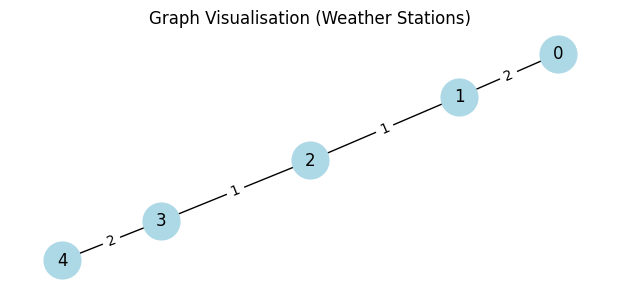

In [71]:
# Import necessary libraries
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from numpy.linalg import eigh

# Set random seed for reproducibility
np.random.seed(42)

# Define a graph where nodes might represent weather stations.
# Here, the edge weights could represent how close stations are (or how similar their conditions should be).
edges = [
    (0, 1, 2),  # Stations 0 and 1 are very close.
    (1, 2, 1),  # Station 1 is moderately close to station 2.
    (2, 3, 1),  # Station 2 is moderately close to station 3.
    (3, 4, 2),  # Stations 3 and 4 are very close.
]
G = nx.Graph()
G.add_weighted_edges_from(edges)

# Compute a spring layout for visualisation
pos = nx.spring_layout(G, seed=42)

# Plot the graph
plt.figure(figsize=(6, 2.5))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Graph Visualisation (Weather Stations)")
plt.show()


## Constructing the Graph Laplacian

We represent the graph structure using matrices. Two key matrices are:
- **Adjacency Matrix $W$:** Contains the weights between nodes (i.e. the closeness of weather stations).
- **Degree Matrix $D$:** A diagonal matrix with $D_{ii} = \sum_j W_{ij}$.

From these, we construct the **graph Laplacian**:
- **Unnormalised Laplacian:** $L = D - W$
- **Normalised (symmetric) Laplacian:** 
  $$
  L_{\text{sym}} = I - D^{-1/2}WD^{-1/2}
  $$



In [65]:
# Compute matrices from the graph
A = nx.to_numpy_array(G)
D = np.diag(A.sum(axis=1))
L = D - A  # Unnormalised Laplacian

# Normalised (symmetric) Laplacian
D_inv_sqrt = np.diag(1.0 / np.sqrt(np.diag(D)))
L_sym = np.eye(len(D)) - D_inv_sqrt @ A @ D_inv_sqrt

# Compute eigenvalues and eigenvectors of L_sym
eigenvalues, eigenvectors = eigh(L_sym)

print("Eigenvalues:", eigenvalues)


Eigenvalues: [1.37259691e-16 1.83503419e-01 1.00000000e+00 1.81649658e+00
 2.00000000e+00]


## Defining and Filtering a Noisy Signal

Let's simulate the scenario with weather stations. Suppose the "true" temperature signal follows a smooth trend, for example:
$$
f = [1, 1, 0, -1, -1]
$$
i.e. the temperatures are:
- Node/Station 0 $ = 1^\circ \mathrm{C}$ 
- Node/Station 1 $ = 1^\circ \mathrm{C}$ 
- Node/Station 2 $ = 0^\circ \mathrm{C}$ 
- Node/Station 3 $ = -1^\circ \mathrm{C}$ 
- Node/Station 4 $ = -1^\circ \mathrm{C}$ 

This might represent two regions with different temperatures and a transition zone. Noise (from measurement error) disturbs this signal.

Graph filtering transforms the noisy signal into the graph spectral domain using the Laplacian eigenvectors (the graph Fourier basis). Here, small eigenvalues correspond to smooth variations (expected from nearby stations), while large eigenvalues indicate rapid changes (likely noise). By applying a low-pass filter
$$
g(\lambda)=e^{-\tau\lambda},
$$
we dampen the high-frequency (noisy) components. The filtered signal is then reconstructed, yielding a signal where neighbouring nodes have more similar values.


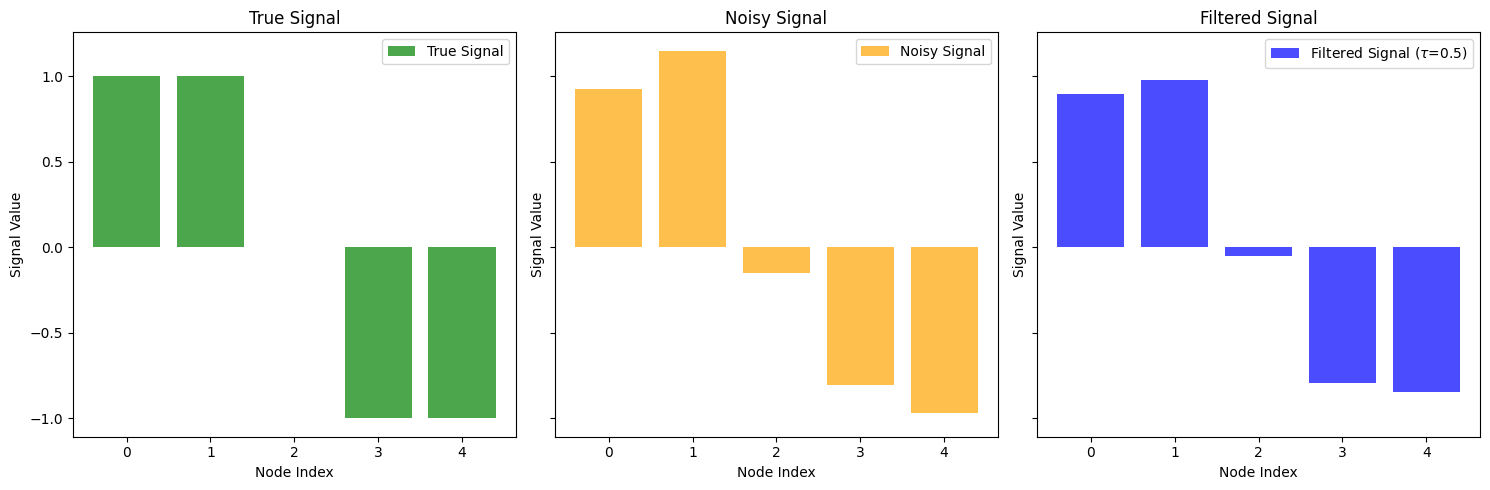

In [118]:
def graph_filtering(clean_signal: list[float], noise: list[float], tau: float):
    """
    Applies graph filtering to a noisy signal.

    Parameters:
    - clean_signal: numpy.ndarray, the true signal values.
    - noise: numpy.ndarray, the noise to be added to the signal.
    - tau: float, the parameter controlling the smoothing of the low-pass filter.

    Returns:
    - filtered_signal: numpy.ndarray, the filtered signal after applying the graph filter.
    """
    # Add noise to the clean signal
    clean_signal = np.array(clean_signal)
    noise = np.array(noise)
    signal = clean_signal + noise

    # Graph Fourier Transform: project the noisy signal onto the eigenbasis
    signal_hat = eigenvectors.T @ signal

    # Define a low-pass filter (parameter tau controls the smoothing)
    g = np.exp(-tau * eigenvalues)  # Filter coefficients

    # Apply the filter in the spectral domain and reconstruct the signal
    filtered_signal_hat = g * signal_hat
    filtered_signal = eigenvectors @ filtered_signal_hat

    # Create 1x3 subplots:
    # Left: True Signal, Middle: Noisy Signal, Right: Filtered Signal
    _, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

    # Plot True Signal
    axs[0].bar(
        range(len(clean_signal)),
        clean_signal,
        color="green",
        alpha=0.7,
        label="True Signal",
    )
    axs[0].set_xlabel("Node Index")
    axs[0].set_ylabel("Signal Value")
    axs[0].set_title("True Signal")
    axs[0].legend()

    # Plot Noisy Signal
    axs[1].bar(
        range(len(signal)), signal, color="orange", alpha=0.7, label="Noisy Signal"
    )
    axs[1].set_xlabel("Node Index")
    axs[1].set_ylabel("Signal Value")
    axs[1].set_title("Noisy Signal")
    axs[1].legend()

    # Plot Filtered Signal
    axs[2].bar(
        range(len(filtered_signal)),
        filtered_signal,
        color="blue",
        alpha=0.7,
        label=rf"Filtered Signal ($\tau$={tau})",
    )
    axs[2].set_xlabel("Node Index")
    axs[2].set_ylabel("Signal Value")
    axs[2].set_title("Filtered Signal")
    axs[2].legend()

    plt.tight_layout()
    plt.show()

    return filtered_signal


# Call the function with the current arguments
filtered_signal = graph_filtering(
    clean_signal=[1, 1, 0, -1, -1], noise= [-0.075,  0.15 , -0.15 ,  0.195,  0.03 ], tau=0.5
)

Note that because node 0 and 1 are very close, their values were 'pulled' closer together. Similarly, nodes 3 and 4 were also 'pulled' closer together. The node in the middle (node 2) was forced to reconcile to its two neighbours, and thus it was 'pulled' closer to the average of its two neighbours, getting coser to 0.

# Visualising the Signal on the Graph

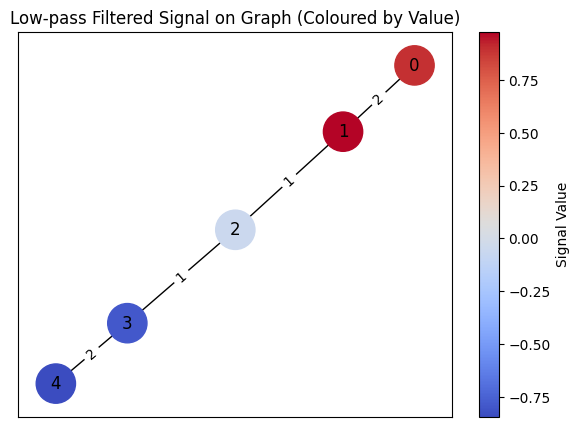

In [119]:
# Plot the graph with nodes coloured by the filtered signal value
fig, ax = plt.subplots(figsize=(7, 5))
nodes = nx.draw_networkx_nodes(G, pos, node_size=800, node_color=filtered_signal,
                               cmap='coolwarm', ax=ax)
nx.draw_networkx_edges(G, pos, ax=ax)
nx.draw_networkx_labels(G, pos, ax=ax)

# Draw edge weights on the graph
edge_weights = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_weights, font_color='black')

plt.title("Low-pass Filtered Signal on Graph (Coloured by Value)")
cbar = plt.colorbar(nodes, ax=ax)
cbar.set_label("Signal Value")
plt.show()


## More Tricky Examples

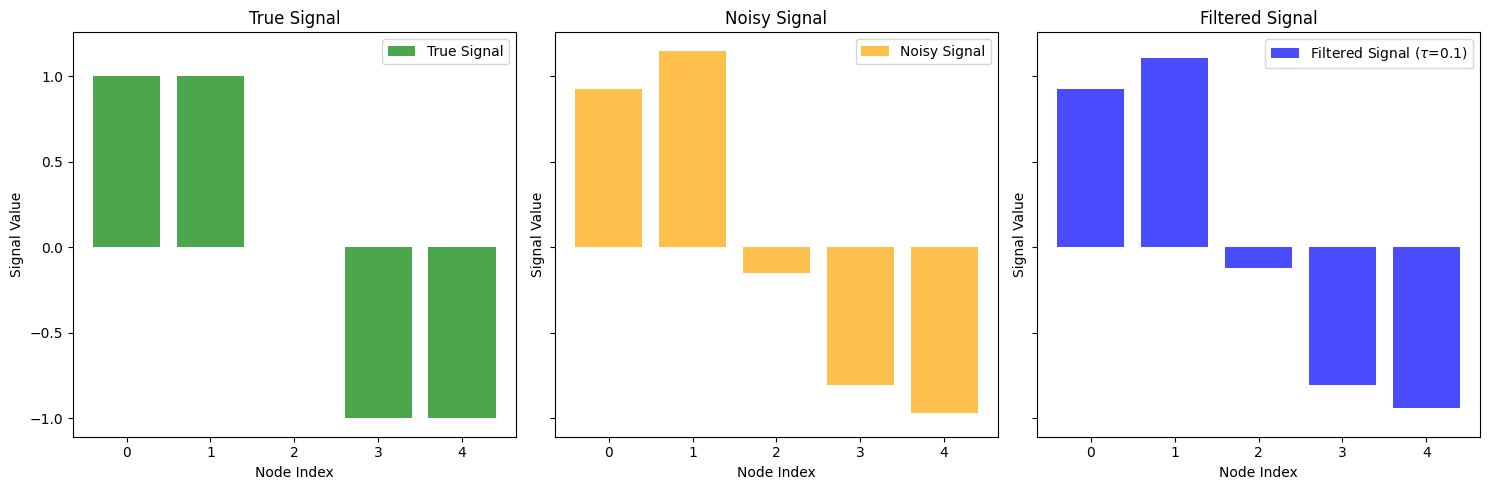

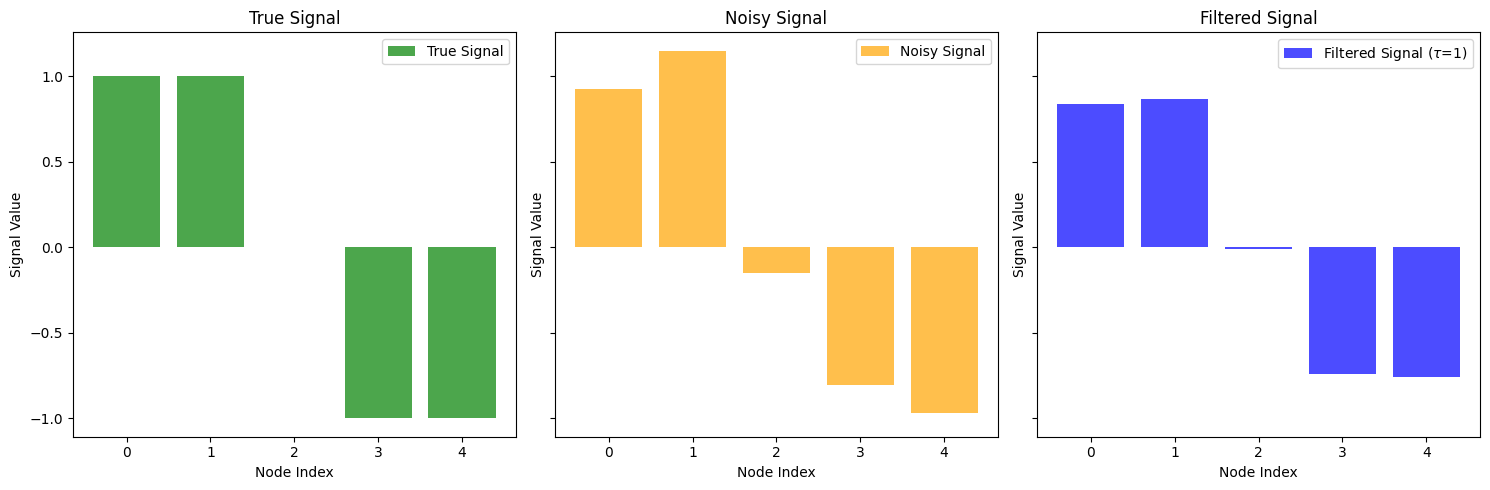

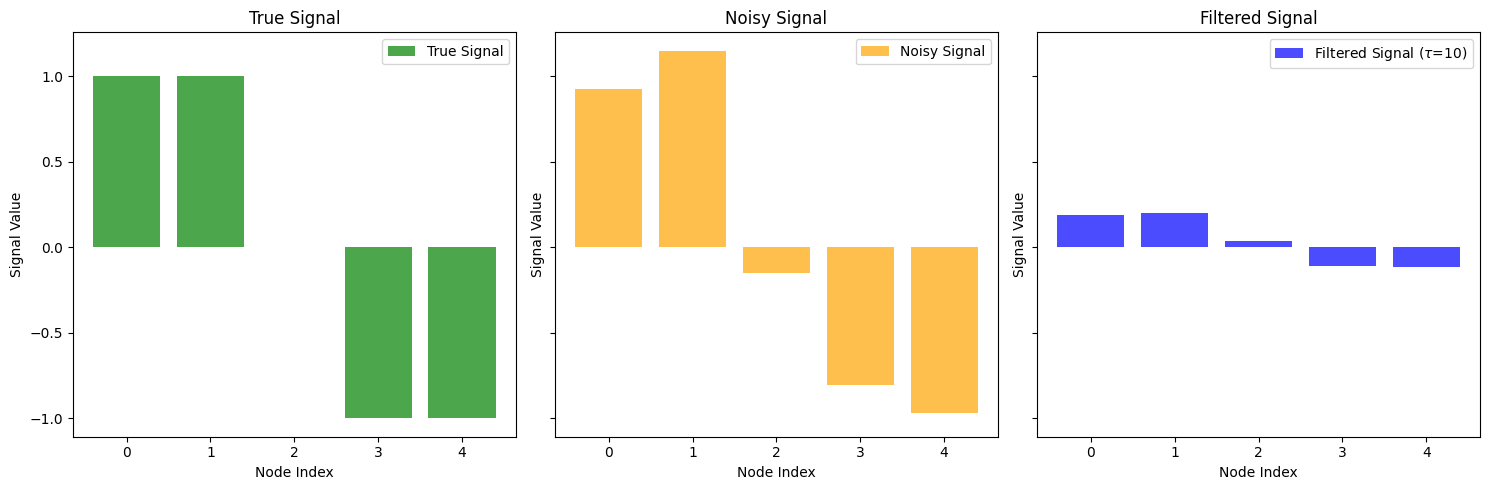

In [113]:
for tau in [0.1, 1, 10]:
    filtered_signal = graph_filtering(
        clean_signal=[1, 1, 0, -1, -1],
        noise=[-0.075, 0.15, -0.15, 0.195, 0.03],
        tau=tau,
    )

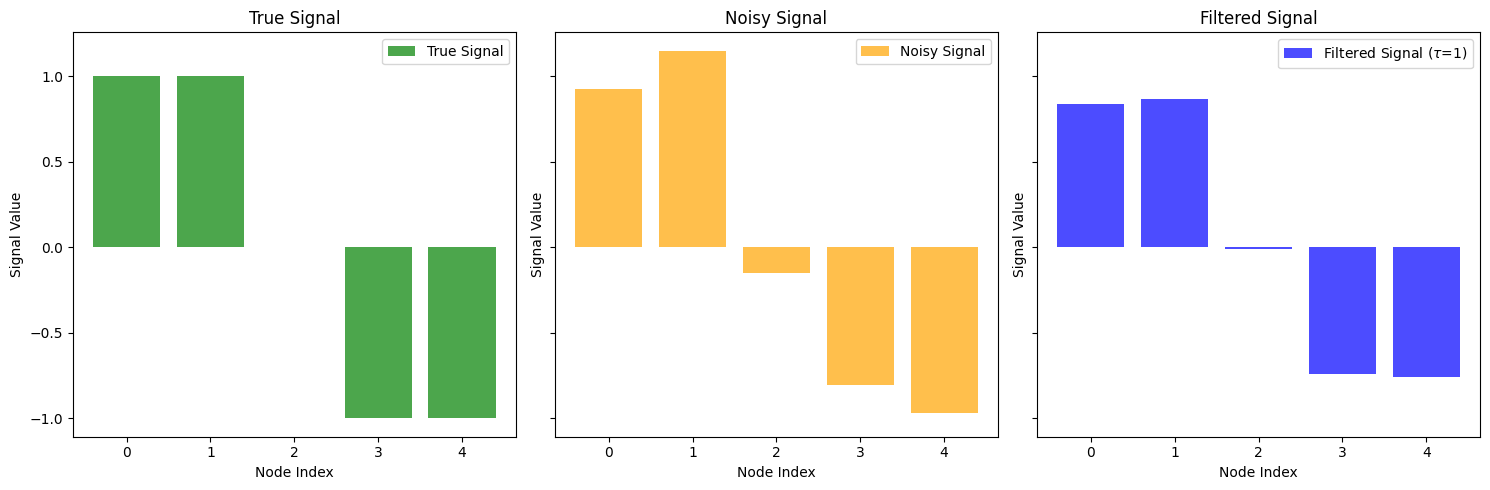

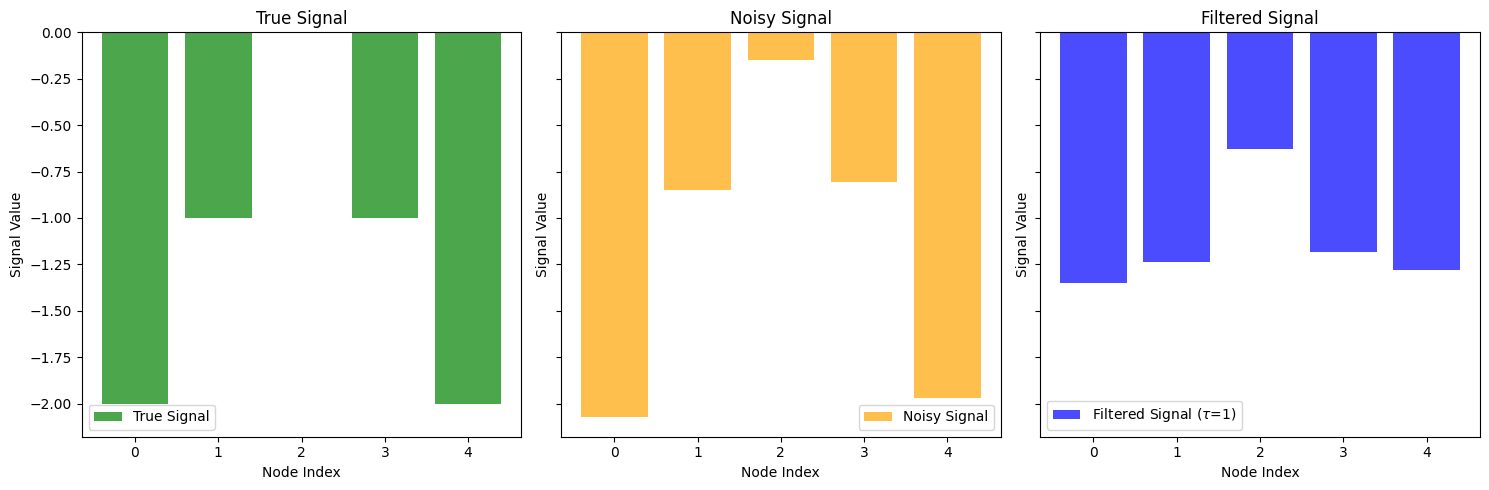

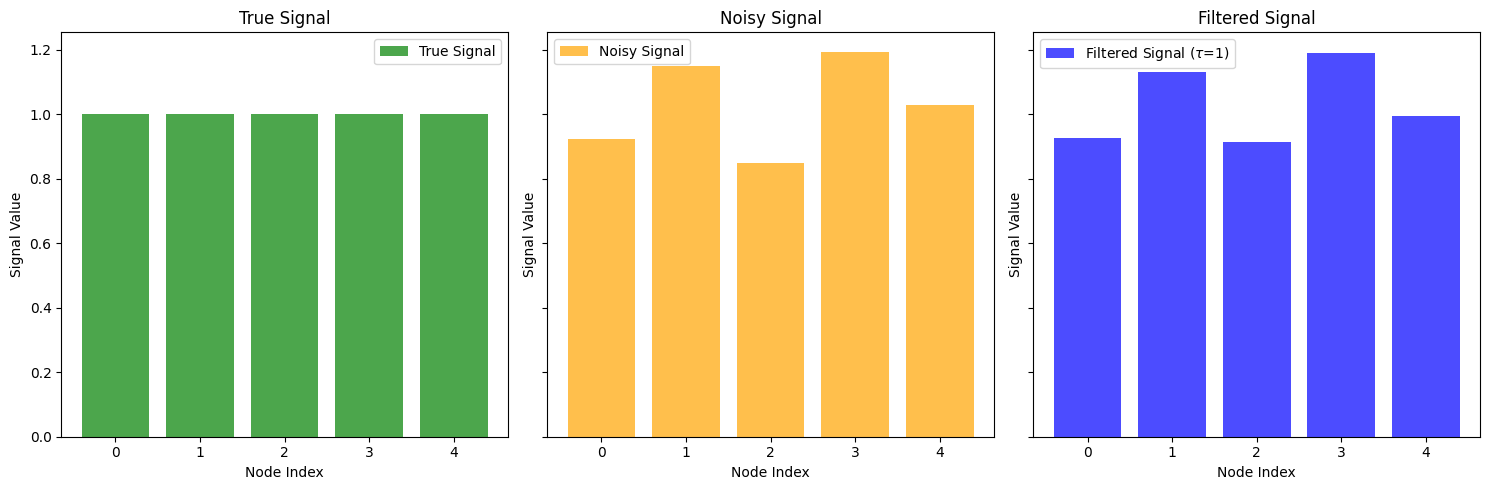

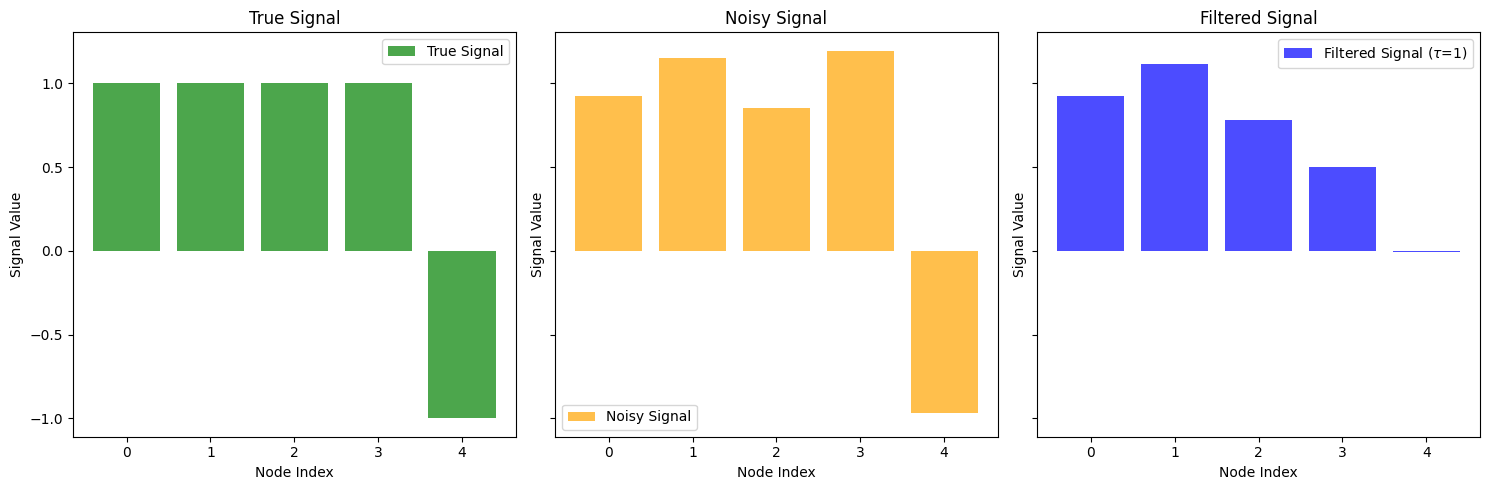

In [115]:
for c_s in [[1, 1, 0, -1, -1], [-2, -1, 0, -1, -2], [1, 1, 1, 1, 1], [1, 1, 1, 1, -1]]:
    filtered_signal = graph_filtering(
        clean_signal=c_s,
        noise=[-0.075, 0.15, -0.15, 0.195, 0.03],
        tau=1,
    )

You can see in these examples that the filtered signal can vary greatly from the original signal. This is because the edges of the graph have greater influence on the signal than the original signal itself. 

The graph structure is:
```
0 -- 1    3 -- 4
      \  /      
       2        
```

Where 0 and 1 are strongly connected, and 3 and 4 are strongly connected. 
So node 3 and 4's values will get 'pulled together', even if their true signals are very different.

This is seen in the last example – even though Node 3 is 1 and Node 4 is -1, Node 3 gets flattedned to 0.5 and node 4 is sent almost to 0. Graph signal filtering does implicitly impose a smoothness prior. It assumes that the true signal should vary gradually over the graph, so when you apply a low‐pass filter, it will smooth out abrupt changes–even if those differences might be genuine. In other words, if two strongly linked nodes have very different values, the filtering will tend to bring them closer together, as it “expects” the signal to be smooth over connected nodes.